In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
od.download('https://www.kaggle.com/datasets/nikhil1e9/loan-default')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sahityapalacharla
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/nikhil1e9/loan-default


100%|██████████| 7.86M/7.86M [00:00<00:00, 675MB/s]

In [4]:
os.listdir('loan-default')

['Loan_default.csv']

In [5]:
data=pd.read_csv('/content/loan-default/Loan_default.csv')

In [6]:
data.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [8]:
data=data.drop('LoanID',axis=1)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             255347 non-null  int64  
 1   Income          255347 non-null  int64  
 2   LoanAmount      255347 non-null  int64  
 3   CreditScore     255347 non-null  int64  
 4   MonthsEmployed  255347 non-null  int64  
 5   NumCreditLines  255347 non-null  int64  
 6   InterestRate    255347 non-null  float64
 7   LoanTerm        255347 non-null  int64  
 8   DTIRatio        255347 non-null  float64
 9   Education       255347 non-null  object 
 10  EmploymentType  255347 non-null  object 
 11  MaritalStatus   255347 non-null  object 
 12  HasMortgage     255347 non-null  object 
 13  HasDependents   255347 non-null  object 
 14  LoanPurpose     255347 non-null  object 
 15  HasCoSigner     255347 non-null  object 
 16  Default         255347 non-null  int64  
dtypes: float64

In [10]:
x=data.drop('Default',axis=1)
y=data['Default']

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in data.select_dtypes(include='object').columns:
  x_train[i]=le.fit_transform(x_train[i])
  x_test[i]=le.transform(x_test[i])

In [15]:
x_train.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
137187,18,137576,209136,846,26,2,10.47,60,0.81,1,2,2,1,0,1,0
230334,47,57194,5970,748,30,2,19.72,36,0.73,1,3,0,0,1,2,0
19687,26,84328,95065,453,7,2,24.25,12,0.45,2,2,1,0,0,4,1
106509,53,49795,229582,533,107,3,14.44,60,0.17,0,2,2,1,0,0,1
242291,49,115450,22072,840,0,4,24.48,12,0.11,0,1,2,0,1,2,1


In [16]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [17]:
x_train=pd.DataFrame(x_train,columns=x.columns)
x_test=pd.DataFrame(x_test,columns=x.columns)

In [18]:
x_train.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,-1.699838,1.413785,1.151487,1.711544,-0.967182,-0.449530,-0.454811,1.415720,1.339989,-0.442742,0.448348,1.226590,0.999936,-1.000406,-0.707810,-1.000563
1,0.234120,-0.649831,-1.715866,1.094714,-0.851727,-0.449530,0.939092,-0.000645,0.993538,-0.442742,1.343560,-1.224023,-1.000064,0.999594,-0.000312,-1.000563
2,-1.166333,0.046770,-0.458437,-0.762072,-1.515594,-0.449530,1.621727,-1.417010,-0.219039,0.450557,0.448348,0.001284,-1.000064,-1.000406,1.414685,0.999437
3,0.634249,-0.839783,1.440049,-0.258537,1.370784,0.445809,0.143437,1.415720,-1.431615,-1.336042,0.448348,1.226590,0.999936,-1.000406,-1.415308,0.999437
4,0.367496,0.845753,-1.488613,1.673779,-1.717640,1.341148,1.656386,-1.417010,-1.691453,-1.336042,-0.446863,1.226590,-1.000064,0.999594,-0.000312,0.999437


In [21]:
x_train.shape

(204277, 16)

In [19]:
import tensorflow as tf
tf.random.set_seed(42)
from tensorflow import keras

In [22]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(16,)),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(16,activation='relu'),
    keras.layers.Dense(2,activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [24]:
history=model.fit(x_train,y_train,validation_split=0.1,epochs=10)

Epoch 1/10
5746/5746 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.8797 - loss: 0.3353 - val_accuracy: 0.8866 - val_loss: 0.3137
Epoch 2/10
5746/5746 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.8840 - loss: 0.3188 - val_accuracy: 0.8868 - val_loss: 0.3121
Epoch 3/10
5746/5746 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.8844 - loss: 0.3173 - val_accuracy: 0.8869 - val_loss: 0.3118
Epoch 4/10
5746/5746 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8845 - loss: 0.3166 - val_accuracy: 0.8872 - val_loss: 0.3114
Epoch 5/10
5746/5746 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.8845 - loss: 0.3162 - val_accuracy: 0.8874 - val_loss: 0.3114
Epoch 6/10
5746/5746 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.8847 - loss: 0.3159 - val_accuracy: 0.8883 - val_loss: 0.3114
Epoch 7/10
5746/5746 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.8849 - loss: 0.3157 - val_accuracy: 0.8875 - val_loss: 0.3114
Epoch 8/10
5746/5746 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.8850 - loss: 0

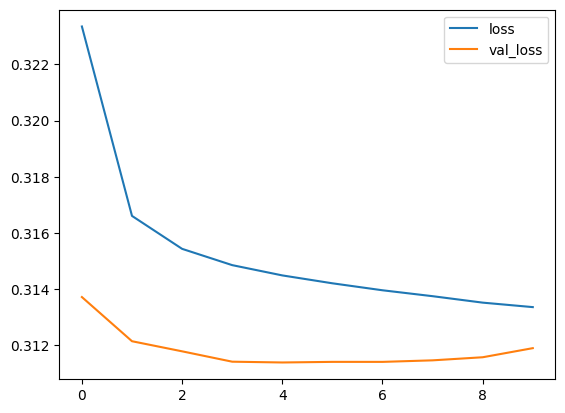

In [25]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()

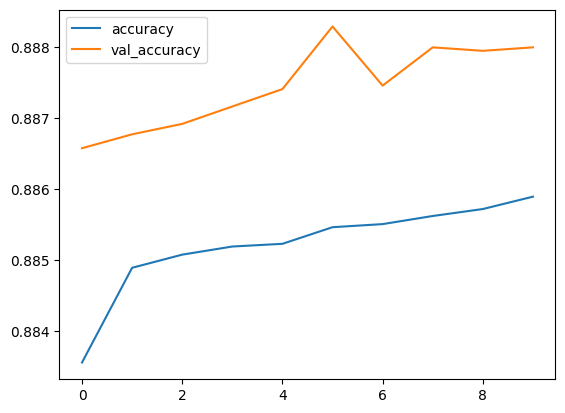

In [26]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [27]:
preds=model.predict(x_test)

1596/1596 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,np.argmax(preds,axis=1))

0.8872136283532407

In [29]:
pred_labels=np.argmax(preds,axis=1)

In [30]:
pred_labels[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [31]:
y_test[:10]

,Default
51139,0
71005,0
35684,0
174087,0
137952,0
137678,0
74249,0
253344,0
219115,0
144898,0
